### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for qq plot
import scipy.stats as stats

#for model building machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#for handling imbalance dataset
from imblearn.under_sampling import NearMiss

#for handling missing values
import missingno as mn

#for hyperparameter tunning
from sklearn.model_selection import GridSearchCV

#to be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

### 2. Import Data

In [2]:
train_data = pd.read_csv("aps_failure_training_set.csv")
test_data = pd.read_csv("aps_failure_test_set.csv")

In [3]:
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

In [4]:
test_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,38710

In [5]:
train_data.shape, test_data.shape

((60000, 171), (16000, 171))

#### 2.1 Combine Train & Test Data

In [6]:
df = pd.concat([train_data, test_data], ignore_index = True)
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

In [7]:
df.shape

(76000, 171)

In [8]:
df.index

RangeIndex(start=0, stop=76000, step=1)

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Check any special character and handle

In [9]:
df[df['ab_000']=='na']

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,819596,584074,0,1644,362,562,842,30194,3911734,1606,0,0,0,1348578,1035668,338762,236540,182278,151778,163248,470800,19292,0,4289260,448,556,642,2,1974038

In [10]:
df.replace('na', np.nan, inplace=True)

#### 3.2 Datatypes

In [11]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003    object
az_004    object
az_005    object
az_006    object
az_007    object
az_008    object
az_009    object
ba_000    object
ba_001    object
ba_002    object
ba_003    object
ba_004    object
ba_005    obje

In [12]:
#change datatypes of columns

for fea in df.columns[1:]:
    try: 
        df[fea] = df[fea].astype(int64)
    except:
        df[fea] = df[fea].astype(float)

In [13]:
df.dtypes

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
ag_000    float64
ag_001    float64
ag_002    float64
ag_003    float64
ag_004    float64
ag_005    float64
ag_006    float64
ag_007    float64
ag_008    float64
ag_009    float64
ah_000    float64
ai_000    float64
aj_000    float64
ak_000    float64
al_000    float64
am_0      float64
an_000    float64
ao_000    float64
ap_000    float64
aq_000    float64
ar_000    float64
as_000    float64
at_000    float64
au_000    float64
av_000    float64
ax_000    float64
ay_000    float64
ay_001    float64
ay_002    float64
ay_003    float64
ay_004    float64
ay_005    float64
ay_006    float64
ay_007    float64
ay_008    float64
ay_009    float64
az_000    float64
az_001    float64
az_002    float64
az_003    float64
az_004    float64
az_005    float64
az_006    float64
az_007    float64
az_008    float64
az_009    float64
ba_000    float64
ba_001    float64
ba_002    

In [14]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,7.600000e+04,17308.000000,7.173900e+04,5.715800e+04,72810.000000,72810.000000,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,7.518000e+04,7.520800e+04,7.520800e+04,7.040200e+04,7.518900e+04,7.520800e+04,7.518900e+04,7.524900e+04,7.518900e+04,7.524900e+04,72513.000000,7.520800e+04,7.520800e+04,7.520800e+04,72812.000000,72811.000000,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,75137.000000,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.518000e+04,72511.000000,72509.000000,72807.000000,72811.000000,7.518900e+04,7.518900e+04,7.524900e+04,7.524900e+04,4.687200e+04,4.149700e+04,2.590500e+04,2.027800e+04,1.729100e+04,1.553900e+04,1.429700e+04,1.360700e+04,7.507200e+04,7.580500e+04,7.511900e+04,7.511900e+04,7.187700e+04,7.542000e+04,7.251400e+04,70438.000000,7.507200e+04,7.188000e+04,75139.0,7.281000e+04,5.715800e+04,57158.000000,57158.000000,7.557600e+04,7.557600e+04,7.557600e+04,63988.000000,63545.000000,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,7.511900e+04,5.715800e+04,72513.000000,7.511900e+04,17308.000000,75142.000000,75142.000000,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,7.514200e+04,58474.000000,58474.000000,5.847400e+04,5.847400e+04,58474.000000,5.847400e+04,58474.000000,58474.000000,5.847400e+04,72809.000000,72512.000000,7.089800e+04,7.089800e+04,7.089800e+04,7.090000e+04,70899.000000,7.089900e+04,7.089800e+04,7.089700e+04,7.511900e+04,7.251200e+04,72510.000000,7.251000e+04,7.251000e+04,7.250900e+04,72509.000000,7.251000e+04,7.251000e+04,7.251300e+04,7.251200e+04,72515.000000,72515.000000,7.089900e+04,63117.000000,63988.000000,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,72514.000000,72515.000000
mean,6.115976e+04,0.725560,3.564398e+08,1.506300e+05,6.736959,10.836314,2.004306e+02,1.204761e+03,9.697328e+03,9.364902e+04,4.483426e+05,1.122573e+06,1.666272e+06,5.007954e+05,3.564389e+04,5.255755e+03,1.832622e+06,9.597229e+03,1.167200e+03,9.689417e+02,6.160588e+04,9.724470e+04,3.503077e+06,3.039594e+06,1.019361e+06,4.491939e+05,0.492877,2.473336e+02,5.196723e+03,2.999350e+02,1145.836840,377.019104,1.495621e+04,1.133445e+04,1.135212e+04,7.321961e+03,1.016125e+04,1.066613e+05,1.081914e+06,1.556827e+06,1.078965e+06,1.158223e+03,7.899449e+03,4.486525e+03,8.046204e+03,8.772173e+04,1.488475e+06,2.1

#### 3.3 Check Duplicates

In [15]:
df.duplicated().sum()

0

In [16]:
df[df.duplicated()]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 99.2+ MB


#### 3.4 Handling Null Values

In [18]:
df.isnull().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
ae_000     3190
af_000     3190
ag_000      860
ag_001      860
ag_002      860
ag_003      860
ag_004      860
ag_005      860
ag_006      860
ag_007      860
ag_008      860
ag_009      860
ah_000      820
ai_000      792
aj_000      792
ak_000     5598
al_000      811
am_0        792
an_000      811
ao_000      751
ap_000      811
aq_000      751
ar_000     3487
as_000      792
at_000      792
au_000      792
av_000     3188
ax_000     3189
ay_000      863
ay_001      863
ay_002      863
ay_003      863
ay_004      863
ay_005      863
ay_006      863
ay_007      863
ay_008      863
ay_009      863
az_000      863
az_001      863
az_002      863
az_003      863
az_004      863
az_005      863
az_006      863
az_007      863
az_008      863
az_009      863
ba_000      881
ba_001      881
ba_002      881
ba_003      881
ba_004      881
ba_005      881
ba_006      881
ba_007      881
ba_008      881
ba_009  

In [19]:
#30 features with highest null values
null_30 = df.isnull().sum().sort_values(ascending=False).head(30)
null_30

br_000    62393
bq_000    61703
bp_000    60461
bo_000    58709
cr_000    58692
ab_000    58692
bn_000    55722
bm_000    50095
bl_000    34503
bk_000    29128
cg_000    18842
co_000    18842
ad_000    18842
ch_000    18842
cf_000    18842
da_000    17526
dc_000    17526
db_000    17526
cu_000    17526
cz_000    17526
cy_000    17526
cv_000    17526
ct_000    17526
cx_000    17526
ec_00     12883
cm_000    12455
cl_000    12012
ed_000    12012
ak_000     5598
ca_000     5562
dtype: int64

In [20]:
#how many features has null values
df.isnull().sum()[df.isnull().sum() !=0]

ab_000    58692
ac_000     4261
ad_000    18842
ae_000     3190
af_000     3190
ag_000      860
ag_001      860
ag_002      860
ag_003      860
ag_004      860
ag_005      860
ag_006      860
ag_007      860
ag_008      860
ag_009      860
ah_000      820
ai_000      792
aj_000      792
ak_000     5598
al_000      811
am_0        792
an_000      811
ao_000      751
ap_000      811
aq_000      751
ar_000     3487
as_000      792
at_000      792
au_000      792
av_000     3188
ax_000     3189
ay_000      863
ay_001      863
ay_002      863
ay_003      863
ay_004      863
ay_005      863
ay_006      863
ay_007      863
ay_008      863
ay_009      863
az_000      863
az_001      863
az_002      863
az_003      863
az_004      863
az_005      863
az_006      863
az_007      863
az_008      863
az_009      863
ba_000      881
ba_001      881
ba_002      881
ba_003      881
ba_004      881
ba_005      881
ba_006      881
ba_007      881
ba_008      881
ba_009      881
bb_000      820
bc_000  

conclusion :169 out of 171 features having null values

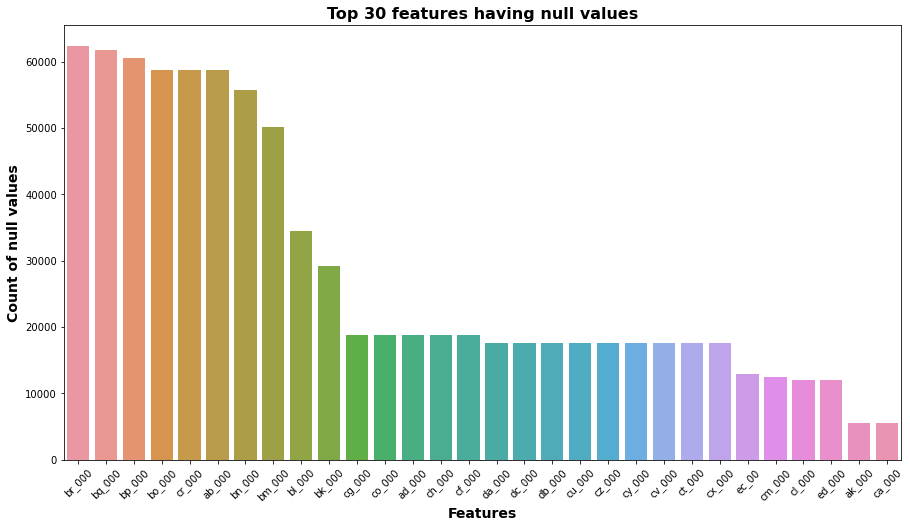

In [21]:
#plotting the top features having nulls
plt.figure(figsize=(15,8))
sns.barplot(y= null_30, x=null_30.index)
plt.xticks(rotation=45)
plt.ylabel("Count of null values", fontsize = 14, fontweight = "bold")
plt.xlabel("Features", fontsize = 14, fontweight = "bold")
plt.title("Top 30 features having null values", fontsize=16, fontweight='bold', y=1)
plt.show()

<AxesSubplot:>

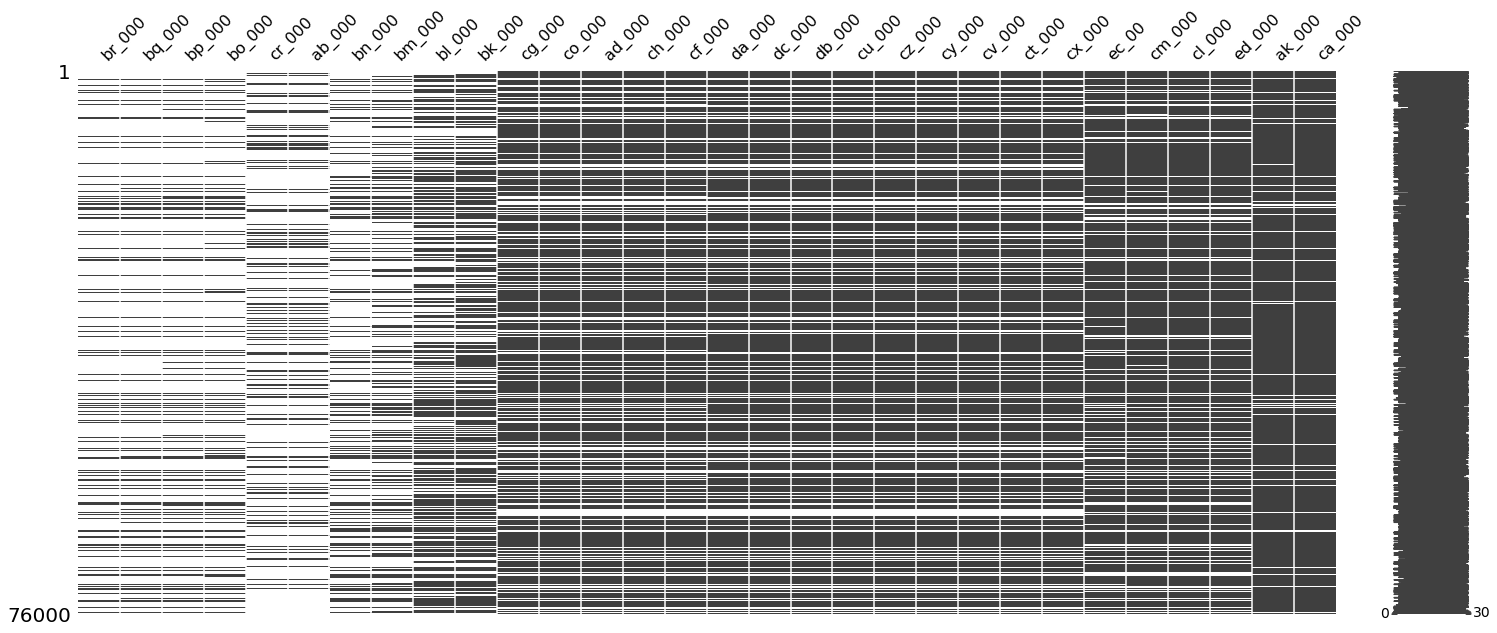

In [22]:
mn.matrix(df[null_30.index])

In [ ]:
#Check data distribution
sns.set_style('whitegrid')
df[null_30.index].hist(figsize=(20,20), bins=30)
plt.show()

Conclusion : Data distribution is skewed so we can impute null values with median

In [ ]:
for feature in df.columns[2:]:
    df[feature] = df[feature].fillna(df[feature].median())

In [ ]:
#check null values
df.isnull().sum()

#### 3.5 Graphical Analysis

###### Univariate Analysis

In [ ]:
numeric_features = [feature for feature in df.columns if feature not in ['class']]

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(35,5,i+1)
    sns.kdeplot(df[numeric_features[i]],shade=True, color='r')
    #plt.xlabel(numeric_features[i])
    plt.tight_layout()


In [ ]:
#Check the outliers

plt.figure(figsize=(20,250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i in range(0,len(numeric_features)):
    plt.subplot(85,3,i+1)
    sns.boxplot(df[numeric_features[i]])
    plt.tight_layout()

#### 3.6 Handling the outliers

In [ ]:
df1 = df.copy()

In [ ]:
#Function to cap outlier
def remover_outlier(in_data,in_col):
    #find iqr
    first_quantile = in_data[in_col].quantile(0.25)
    third_quantile = in_data[in_col].quantile(0.75)
    iqr = third_quantile - first_quantile
    upper_limit = third_quantile + 1.5 * iqr
    lower_limit = first_quantile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [ ]:
for feature in numeric_features:
    df1 = remover_outlier(df1, feature)

In [ ]:
plt.figure(figsize=(20,250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i in range(0,len(numeric_features)):
    plt.subplot(85,3,i+1)
    sns.boxplot(df1[numeric_features[i]])
    plt.tight_layout()

#### 3.7 Correlations

In [ ]:
df1.corr()

In [ ]:
label_encoder = LabelEncoder()
df1['class'] = label_encoder.fit_transform(df['class'])

In [ ]:
df1

In [ ]:
df1['class'].value_counts()

In [ ]:
sns.countplot(df1['class'])

### 4. Handle the imbalance dataset

In [ ]:
x = df1.drop('class', axis=1)
y = df1['class']

In [ ]:
nm = NearMiss()
x_imb, y_imb = nm.fit_resample(x,y)

In [ ]:
print("Original dataset :\n", y.value_counts())
print("Resampled dataset :\n", y_imb.value_counts())

In [ ]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, random_state=34, test_size=0.33)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

### 5. Feature Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
pd.DataFrame(x_train)

### 6.Model Building

#### 6.1 Function for model training and evaluation

In [ ]:
#create the function that will evaluate the model

def model_evaluator(actual_val, pred_val):
    acc = round(accuracy_score(actual_val,pred_val),3)
    prec = round(precision_score(actual_val, pred_val),3)
    rec = round(recall_score(actual_val,pred_val),3)
    roc_auc = round(roc_auc_score(actual_val, pred_val),3)
    return acc, prec, rec, roc_auc

#dictionary containing model objects from diffrent algorithms

models = {"Logistic Regression" : LogisticRegression(),
         "Support VectorClassifier" : SVC(),
         "Decision Tree Classifier" : DecisionTreeClassifier(),
         "Random Forest Classifier" : RandomForestClassifier(),
         "Bagging Classifier" : BaggingClassifier(),
         "Extra Tree Classifier" : ExtraTreesClassifier(),
         "Ada Boost Classifier" : AdaBoostClassifier(),
         "Gradient Boost Classifier" : GradientBoostingClassifier(),
         "XG Boost Classifier" : XGBClassifier()}

#Function for model training
def model_trainer(model, x_df, y_df, x_test_df):
    model.fit(x_df,y_df)
    y_train_pred = model.predict(x_df)
    y_pred = model.predict(x_test_df)
    return y_train_pred, y_pred
    

In [ ]:
model_list = []
#accuracy score
train_acc_score_list = []
test_acc_score_list = []

#precision score
train_prec_score_list = []
test_prec_score_list = []

#recall score
train_recall_score_list = []
test_recall_score_list = []

#roc_auc score list
train_rocauc_score_list = []
test_rocauc_score_list = []

for i in range(len(models.keys())):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    y_train_pred , pred_val = model_trainer(model, x_train, y_train, x_test)
    
    #model performance on training data
    acc1, prec1, rec1, roc_auc1 = model_evaluator(y_train, y_train_pred)
    
    #model performance on testing data
    acc, prec, rec, roc_auc = model_evaluator(y_test, pred_val)
    
    #append values to list
    model_list.append(model_name)
    train_acc_score_list.append(acc1)
    test_acc_score_list.append(acc)
    train_prec_score_list.append(prec1)
    test_prec_score_list.append(prec)
    train_recall_score_list.append(rec1)
    test_recall_score_list.append(rec)
    train_rocauc_score_list.append(roc_auc1)
    train_rocauc_score_list.append(roc_auc)
    
    #plot roc_curve
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_val)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label = 'ROC curve (area = %0.2f)'%roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(" ROC Curve for {}".format(model_name))
    plt.legend()
    plt.show()


In [ ]:
all_model = pd.DataFrame(list(zip( model_list,train_acc_score_list,test_acc_score_list,train_prec_score_list,
                                  test_prec_score_list,train_recall_score_list,test_recall_score_list,
                                  train_rocauc_score_list,train_rocauc_score_list)),
                        columns = ['Model','Train_Accuracy','Test_Accuracy',
                                   'Train_Precision','Test_Precision',
                                  'Train_Recall','Test_Recall',
                                   'Train_RocAuc','Test_RocAuc']).sort_values(by='Test_Accuracy',ascending=False).reset_index()

all_model.drop('index', axis=1, inplace=True)
all_model

#### 6.2 Hyperparamter Tunning

In [ ]:
#Hyperparameters

rfc_params = {'n_estimators':[100,200,300],
             'max_depth':[None,5,10],
             'min_samples_leaf':[5,10,15]}

dtc_params = {'criterion':['gini','entropy'],
             'max_depth':[None,5,10],
             'min_samples_leaf':[5,10,15]}

etc_params = {'n_estimators':[100,200,300],
             'max_depth':[None,5,10],
             'min_samples_leaf':[5,10,15]}

gbc_params = {'criterion':['friedman_mse','squared_error','mse'],
             'n_estimators':[100,200,300],
             'min_samples_split':[20,30,40]}

xgbc_params = {'max_depth':[2,4,6],
              'min_child_weight':[2,4,6],
              'gamma':[i/10 for i in range(4)]}

In [ ]:
model_params = {}

##### Hyperparamter tunning for random forest classifier

In [ ]:
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=rfc_params, cv=2, verbose=2, n_jobs=-1)
grid.fit(x_train,y_train)
model_params['Random forest Classifier'] = grid.best_params_

##### Hyperparamter tunning for Decision tree classifier

In [ ]:
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=dtc_params, cv=2, verbose=2, n_jobs=-1)
grid.fit(x_train,y_train)
model_params['Decision tree Classifier'] = grid.best_params_

##### Hyperparamter tunning for Extra tree classifier

In [ ]:
model = ExtraTreesClassifier()
grid = GridSearchCV(estimator=model, param_grid=etc_params, cv=2, verbose=2, n_jobs=-1)
grid.fit(x_train,y_train)
model_params['Extra tree Classifier'] = grid.best_params_

##### Hyperparamter tunning for Gradient Boost classifier

In [ ]:
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model, param_grid=gbc_params, cv=2, verbose=2, n_jobs=-1)
grid.fit(x_train,y_train)
model_params['Gradient boost Classifier'] = grid.best_params_

##### Hyperparamter tunning for XG Boost classifier

In [ ]:
model = XGBClassifier()
grid = GridSearchCV(estimator=model, param_grid=xgbc_params, cv=2, verbose=2, n_jobs=-1)
grid.fit(x_train, y_train)
model_params['XG Boost Classifier'] = grid.best_params_

In [ ]:
model_params

In [ ]:
for i in model_params:
    print(f"Best parameters for {i} are : {model_params[i]}")

#### Re-training model with best hyperparameters

In [ ]:
hype_models = {'Random forest Classifier': RandomForestClassifier(max_depth=None, min_samples_leaf=5,n_estimators=200),
              'Decision tree Classifier' : DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10),
              'Extra tree Classifier': ExtraTreesClassifier(max_depth=None, min_samples_leaf=5, n_estimators=100),
              'XG Boost Classifier' : XGBClassifier(gamma=0.0, max_depth=2, min_child_weight=2),
              'Gradient boost Classifier': GradientBoostingClassifier(criterion='mse', min_samples_split=20,
                                                                      n_estimators=100)}

In [ ]:
model_list2 = []
#accuracy score
train_acc_score_list2 = []
test_acc_score_list2 = []

#precision score
train_prec_score_list2 = []
test_prec_score_list2 = []

#recall score
train_recall_score_list2 = []
test_recall_score_list2 = []

#roc_auc score list
train_rocauc_score_list2 = []
test_rocauc_score_list2 = []

for i in range(len(hype_models.keys())):
    model = list(hype_models.values())[i]
    model_name = list(hype_models.keys())[i]
    
    y_train_pred , pred_val = model_trainer(model, x_train, y_train, x_test)
    
    #model performance on training data
    acc1, prec1, rec1, roc_auc1 = model_evaluator(y_train, y_train_pred)
    
    #model performance on testing data
    acc, prec, rec, roc_auc = model_evaluator(y_test, pred_val)
    
    #append values to list
    model_list2.append(model_name)
    train_acc_score_list2.append(acc1)
    test_acc_score_list2.append(acc)
    train_prec_score_list2.append(prec1)
    test_prec_score_list2.append(prec)
    train_recall_score_list2.append(rec1)
    test_recall_score_list2.append(rec)
    train_rocauc_score_list2.append(roc_auc1)
    train_rocauc_score_list2.append(roc_auc)
    
    #plot roc_curve
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_val)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label = 'ROC curve (area = %0.2f)'%roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(" ROC Curve for {}".format(model_name))
    plt.legend()
    plt.show()

In [ ]:
all_hype_model = pd.DataFrame(list(zip( model_list2,train_acc_score_list2,test_acc_score_list2,train_prec_score_list2,
                                  test_prec_score_list2,train_recall_score_list2,test_recall_score_list2,
                                  train_rocauc_score_list2,train_rocauc_score_list2)),
                        columns = ['Model','Train_Accuracy','Test_Accuracy',
                                   'Train_Precision','Test_Precision',
                                  'Train_Recall','Test_Recall',
                                   'Train_RocAuc','Test_RocAuc']).sort_values(by='Test_Accuracy',ascending=False).reset_index()

all_hype_model.drop('index', axis=1, inplace=True)
all_hype_model